# Visualization of "specificity" in the PRSB corpus

In [29]:
import pandas as pd
import numpy as np
import pickle
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel

import matplotlib.pyplot as plt
import seaborn as sns

import my_files
import my_preprocessing
from my_preprocessing import clean_text
from my_lda import MyCorpus, make_doc_path_list
import my_vis

In [ ]:
# load LDA model
model_id = 'lda_25_1.0_0.002'

model_path = f'models/{model_id}.pkl'
model = my_files.load_model(model_path)

# load dictionary
dict_path = 'models/dictionary.dict'
dictionary = Dictionary.load(dict_path)

# make corpus
metadata = my_preprocessing.load_metadata()
metadata = my_preprocessing.drop_non_research(metadata)
doc_path_list = ['data/txt/' + file for file in metadata.filename]
corpus = MyCorpus(doc_path_list, my_preprocessing.clean_text, dictionary=dictionary)

## Topic distribution over time

In [3]:
# add path to beginning of filename in metadata
path = 'data/txt/'
metadata['filename'] = metadata['filename'].apply(lambda x: path + x)
metadata = metadata.set_index('filename')
print(len(metadata))

15092


In [4]:
dt_path = f'models/{model_id}_doc_topics.csv.gz'
doc_topics = pd.read_csv(dt_path, index_col=0, compression='gzip')
print(len(doc_topics))

15092


In [5]:
# join dataframes on filename
df = metadata.join(doc_topics)
print(len(df))

15092


In [54]:
df_topic_years.columns.astype(int)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24],
           dtype='int64', name='topic')

In [55]:
# sort by year
nums = [str(i) for i in range(25)]
df_topic_years = df.groupby('year')[nums].mean()
df_topic_years.columns.name='topic'
df_topic_years.columns = df_topic_years.columns.astype(int)
df_topic_years.head()

topic,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
year,,,,,,,,,,,,,,,,,,,,,
1905,0.003665,0.006201,0.011179,0.063319,0.006374,0.003000,0.009597,0.083294,0.030059,0.004635,...,0.003177,0.003180,0.012557,0.040883,0.007963,0.038767,0.008438,0.002288,0.014660,0.060153
1906,0.006996,0.004698,0.011983,0.105758,0.004623,0.003707,0.012096,0.097189,0.030467,0.005868,...,0.006518,0.001553,0.022299,0.027467,0.005644,0.010275,0.004595,0.007613,0.017382,0.053114
1907,0.000741,0.000196,0.014947,0.084249,0.002182,0.002283,0.006106,0.103971,0.036845,0.001733,...,0.002030,0.003177,0.026365,0.030494,0.002365,0.016766,0.003778,0.001210,0.016263,0.077669
1908,0.009134,0.001792,0.011049,0.056251,0.002881,0.002637,0.005571,0.163191,0.019059,0.005217,...,0.002372,0.000560,0.004240,0.048526,0.003861,0.012234,0.001539,0.028442,0.007158,0.057390
1909,0.006970,0.007596,0.023972,0.053269,0.005796,0.001786,0.011893,0.062579,0.052548,0.007529,...,0.005076,0.000390,0.015915,0.084364,0.009792,0.014047,0.002242,0.016999,0.015727,0.040555


In [66]:
df_topic_years[0]

year
1905    0.003665
1906    0.006996
1907    0.000741
1908    0.009134
1909    0.006970
          ...   
2010    0.057200
2011    0.068221
2012    0.072960
2013    0.050679
2014    0.045428
Name: 0, Length: 110, dtype: float64

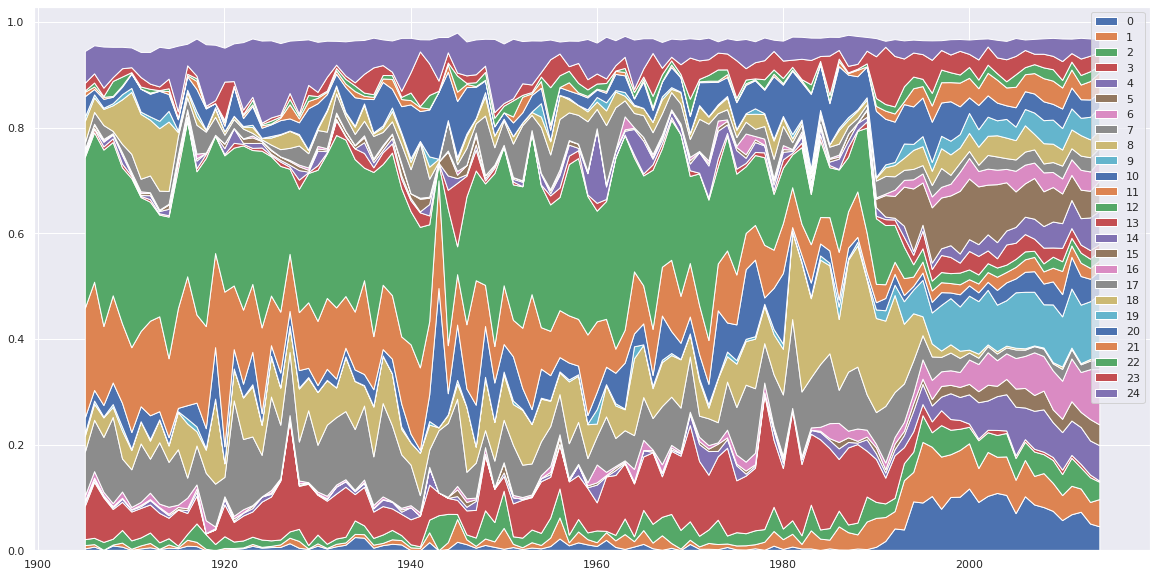

In [90]:
sns.set_theme(style="darkgrid")
sns.color_palette("pastel")

data = tuple([df_topic_years[i] for i in df_topic_years.columns])

# Plot the distribution
plt.figure(figsize=(20, 10))
plt.stackplot(
    df_topic_years.index,
    *data,
    labels=tuple(df_topic_years.columns),
    colors=None,
    baseline='zero',
    data=None
)
plt.legend(loc='upper right')


## Top topics in which "specificity" occurs

In [30]:
word = 'specificity'
my_vis.word_report(word, corpus, model, top_topics=10)

Topic 17: 0.00048439018428325653:
growth
strain
virus
strains
bacteria
medium
resistance
cells
culture
plants


Topic 23: 0.00040123824146576226:
chromosomes
dna
gene
genes
chromosome
pollen
fig
plants
rna
nuclear


Topic 12: 0.00025122571969404817:
acid
water
oxygen
activity
solution
blood
concentration
ph
protein
temperature


Topic 18: 0.00021685259707737714:
host
parasite
infected
infection
parasites
blood
days
hosts
immune
mice


Topic 9: 0.00016031086852308363:
phylogenetic
sequences
tree
dna
taxa
phylogeny
populations
analyses
molecular
sequence


Topic 3: 0.00015736452769488096:
cells
cell
plate
normal
membrane
tissue
days
seen
nuclei
layer


Topic 21: 0.0001384871284244582:
colonies
colony
workers
ovaries
bees
ovary
social
queen
ants
males


Topic 7: 0.00012122822954552248:
nerve
stimulation
animals
muscle
fibres
normal
brain
rats
stimulus
activity


Topic 6: 0.0001100152003346011:
seeds
plants
plant
pollen
seed
diversity
forest
soil
community
extinction


Topic 19: 0.00010832

In [31]:
# find words containing 'specificity'
words = corpus.dictionary.id2token.values()
spec_words = [word for word in words if 'specificity' in word]
spec_words

['specificity',
 'host-specificity',
 'species-specificity',
 'tissue-specificity',
 'conspecificity',
 'non-specificity',
 'sex-specificity',
 'age-specificity',
 'stereospecificity']